In [14]:
import numpy as np
import sklearn 
import pandas as pd
import xgboost as xg
import altair as alt
import nbformat
import seaborn as sns
import matplotlib as plt

In [15]:
sharktank = pd.read_csv('Shark Tank US dataset.csv',  encoding= 'unicode_escape')

In [16]:
sharktank['Industry'].value_counts()

Food and Beverage              202
Fashion / Beauty               167
Lifestyle / Home               140
Children / Education            93
Fitness / Sports / Outdoors     93
Software / Tech                 60
Pet Products                    43
Health / Wellness               36
Business Services               29
Media / Entertainment           23
Lifestyle/Home                  19
Automotive                      12
Health/Wellness                 12
Green/CleanTech                 11
Travel                          11
Fashion/Beauty                  11
Uncertain / Other                9
Children/Education               9
Fitness/Sports/Outdoors          8
Software/Tech                    3
Name: Industry, dtype: int64

In [17]:
list(sharktank.columns)

['Season Number',
 'Episode Number',
 'Pitch Number',
 'Startup Name',
 'Industry',
 'Business Description',
 'Pitchers Gender',
 'Pitchers State',
 'Pitchers City',
 'Entrepreneur Names',
 'Company Website',
 'Multiple Entrepreneurs',
 'Original Ask Amount',
 'Original Offered Equity',
 'Valuation Requested',
 'Got Deal',
 'Total Deal Amount',
 'Total Deal Equity',
 'Deal Valuation',
 'Number of sharks in deal',
 'Investment Amount Per Shark',
 'Royalty Deal',
 'Loan',
 'Barbara Corcoran Investment Amount',
 'Mark Cuban Investment Amount',
 'Lori Greiner Investment Amount',
 'Robert Herjavec Investment Amount',
 'Daymond John Investment Amount',
 'Kevin O Leary Investment Amount',
 'Guest Investment Amount',
 'BarbaraCorcoran Present',
 'MarkCuban Present',
 'LoriGreiner Present',
 'RobertHerjavec Present',
 'DaymondJohn Present',
 'KevinOLeary Present',
 'KevinHarrington Present',
 'Guest Name',
 'Notes']

In [18]:
kevin = sharktank.loc[sharktank['KevinOLeary Present'] == 1]
barbara = sharktank.loc[sharktank['BarbaraCorcoran Present'] == 1]
robert = sharktank.loc[sharktank['RobertHerjavec Present'] == 1]
daymond = sharktank.loc[sharktank['DaymondJohn Present'] == 1]
kevinharrington = sharktank.loc[sharktank['KevinHarrington Present'] == 1]
lori = sharktank.loc[sharktank['LoriGreiner Present'] == 1]
markcuban = sharktank.loc[sharktank['MarkCuban Present'] == 1]

In [19]:

alt.renderers.enable('default')
chart = alt.Chart(sharktank).mark_bar().encode(
    x = 'Industry:O',
    y = 'count(Industry):Q'
)

chart


alt.Chart(...)

In [20]:
sharktank['Pitchers Gender'].value_counts()

Male          584
Female        245
Mixed Team    162
Name: Pitchers Gender, dtype: int64

In [21]:
gotdeal = sharktank['Got Deal'].value_counts()

In [22]:
chart = alt.Chart(sharktank).mark_bar().encode(
    x = 'Got Deal:O',
    y = 'count(Got Deal):Q'
)

chart

alt.Chart(...)

In [23]:


sharktank['Season Number'] = sharktank['Season Number'].astype(pd.Int32Dtype())
sharktank['Episode Number'] = sharktank['Episode Number'].astype(pd.Int32Dtype())
sharktank['Pitch Number'] = sharktank['Pitch Number'].astype(pd.Int32Dtype())

sharktank['Startup Name'] = sharktank['Startup Name'].astype(str)
sharktank['Industry'] = sharktank['Industry'].astype(str)
sharktank['Business Description'] = sharktank['Business Description'].astype(str)

sharktank['Multiple Entrepreneurs'] = sharktank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())



In [24]:
# Calculate correlation matrix
corr = sharktank.corr()

# Reshape correlation matrix into tidy format
corr = corr.stack().reset_index()
corr.columns = ['var1', 'var2', 'corr']

# Create correlation matrix plot using Altair
chart = alt.Chart(corr).mark_rect().encode(
    x='var1:N',
    y='var2:N',
    color='corr:Q'
)

# Add text to the correlation matrix plot
text = chart.mark_text(baseline='middle').encode(
    text=alt.Text('corr:Q', format='.2f'),
    color=alt.condition(
        alt.datum.corr > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)

(chart + text).configure_view(stroke=None)

chart

/var/folders/2_/dkxg0fq56mv06fxh6723qjn00000gn/T/ipykernel_46113/2379972772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sharktank.corr()


alt.Chart(...)

### Linear Regression (This is wrong duh)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
linear_sharktank = sharktank.drop(['Got Deal', 'Startup Name',
 'Industry',
 'Business Description',
 'Pitchers Gender',
 'Pitchers State',
 'Pitchers City',
 'Entrepreneur Names',
 'Company Website','Notes','Guest Name'], axis=1)

linear_sharktank = linear_sharktank.replace(',','', regex=True)
linear_sharktank = linear_sharktank.astype(float)
X = linear_sharktank
y = sharktank['Got Deal']
imputer = SimpleImputer()
X = imputer.fit_transform(X)

X_train, X_test,  y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr.fit(X_train, y_train)

pred = lr.predict(X_test)


print('Mean absolute error:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('sqrt MSE:', np.sqrt(mean_squared_error(y_test, pred)))


Mean absolute error: 0.4916767691422439
MSE: 0.26998585150854787
sqrt MSE: 0.5196016277000562


In [ ]:
lr.predict(X_test)

array([ 0.34439655,  0.50952019,  0.65857367,  0.62427087, -0.00722065,
        0.65591519,  0.50395778,  0.20676737,  0.36016326,  0.69775953,
        0.50572368,  0.62912923,  0.36061778,  0.19530382,  0.61249838,
        0.68886451,  0.75992309,  0.42401292,  0.10003867,  0.6654807 ,
        0.47300691,  0.6795425 ,  0.63857348,  0.74362766,  0.58063025,
        0.51092109,  0.69216875,  0.64410448,  0.53746501,  0.65359295,
        0.69153142,  0.7699118 ,  0.53395815,  0.53560174,  0.59572544,
        0.63371681,  0.58476185,  0.68343522,  0.64361705,  0.61325807,
        0.64405346,  0.33337422,  0.43556943,  0.73177822,  0.63632849,
        0.60085406,  0.62394125,  0.59991657,  0.76304326,  0.55776165,
        0.14391213,  0.55738147,  0.70274481,  0.43296567,  0.56382708,
        0.68187875,  0.57129661,  0.53832215,  0.53697713,  0.64963528,
        0.69543393,  0.62294415,  0.68563065,  0.61414084,  0.61126311,
        0.47089413,  0.57100923,  0.73634721,  0.70497685,  0.37

### SVM

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import svm
from sklearn.metrics import f1_score, confusion_matrix, classification_report

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.fit_transform(X_test)

clf = svm.SVC()

clf = clf.fit(X_train_imp, y_train)

prediction = clf.predict(X_test_imp)

print(prediction)

print(confusion_matrix(y_test, prediction))
print(f1_score(y_test, prediction))

[0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0
 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1
 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0]
[[114  26]
 [ 21 167]]
0.8766404199475065


In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       140
           1       0.87      0.89      0.88       188

    accuracy                           0.86       328
   macro avg       0.85      0.85      0.85       328
weighted avg       0.86      0.86      0.86       328



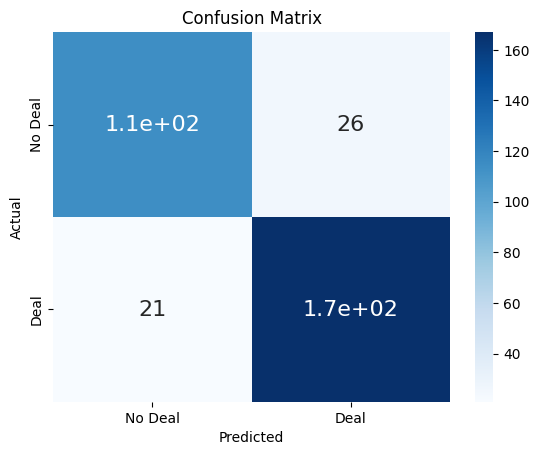

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['No Deal', 'Deal']

cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels = labels, yticklabels = labels, annot_kws={"size": 16})


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
Total = TN + FN + TP + FP
print(Total)
print(f'The True negative is {TN}, the False Negative amount is {FN}, the TP amount is {TP}, and FP is {FP}')

328
The True negative is 114, the False Negative amount is 21, the TP amount is 167, and FP is 26


### Column Transformer

In [ ]:
union_update = sharktank.drop(['Got Deal',
 'Business Description',
 'Entrepreneur Names',
 'Company Website','Notes','Guest Name'], axis=1)

union_update = union_update.replace(',','', regex=True)

X1 = union_update
y = sharktank['Got Deal']


X1_train, X1_test,  y1_train, y1_test = train_test_split(
    X1, y, test_size=0.33, random_state=42
)

In [ ]:

X_train_df = pd.DataFrame(X1_train)



In [ ]:
def convert_columns_to_dtype(df, column_dtype_dict):
    """
    Converts specified columns in a Pandas DataFrame to the specified data types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to modify.
    column_dtype_dict : dict
        A dictionary mapping column names to their desired data types. The keys
        should be the column names, and the values should be the desired data types,
        specified as a string (e.g., 'int', 'float', 'datetime', 'category', etc.).
    
    Returns:
    --------
    pandas.DataFrame
        The modified DataFrame with specified columns converted to the specified data types.
    """
    # loop over the dictionary of column names and data types
    for col, dtype in column_dtype_dict.items():
        # use astype method to convert column to specified data type
        df[col] = df[col].astype(dtype)
    
    # return modified DataFrame
    return df




In [ ]:
X_train_df = convert_columns_to_dtype(X_train_df, {'Original Ask Amount': 'float64', 'Valuation Requested':'float64', 'Total Deal Amount': 'float64', 'Deal Valuation': 'float64'})

In [ ]:
# Select categorical columns
categorical = list(X_train_df.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

Categorical columns are: ['Startup Name', 'Industry', 'Pitchers Gender', 'Pitchers State', 'Pitchers City']


In [ ]:
dtypes_to_select = ['Int32', 'float64']
numerical = list(X_train_df.select_dtypes(include=dtypes_to_select).columns)
print(f"Numerical columns are: {numerical}")

Numerical columns are: ['Season Number', 'Episode Number', 'Pitch Number', 'Multiple Entrepreneurs', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Royalty Deal', 'Loan', 'Barbara Corcoran Investment Amount', 'Mark Cuban Investment Amount', 'Lori Greiner Investment Amount', 'Robert Herjavec Investment Amount', 'Daymond John Investment Amount', 'Kevin O Leary Investment Amount', 'Guest Investment Amount', 'BarbaraCorcoran Present', 'MarkCuban Present', 'LoriGreiner Present', 'RobertHerjavec Present', 'DaymondJohn Present', 'KevinOLeary Present', 'KevinHarrington Present']


In [ ]:
def print_dtypes(df):
    """
    Prints the data type of each column in a pandas DataFrame.

    Args:
        df (pandas.DataFrame): The pandas DataFrame to print.

    Returns:
        None
    """
    print("Column\t\tData Type")
    for col in df.columns:
        print(f"{col}\t\t{df[col].dtype}")

print_dtypes(X_train_df)

Column		Data Type
Season Number		Int32
Episode Number		Int32
Pitch Number		Int32
Startup Name		object
Industry		object
Pitchers Gender		object
Pitchers State		object
Pitchers City		object
Multiple Entrepreneurs		Int32
Original Ask Amount		float64
Original Offered Equity		float64
Valuation Requested		float64
Total Deal Amount		float64
Total Deal Equity		float64
Deal Valuation		float64
Number of sharks in deal		float64
Investment Amount Per Shark		float64
Royalty Deal		float64
Loan		float64
Barbara Corcoran Investment Amount		float64
Mark Cuban Investment Amount		float64
Lori Greiner Investment Amount		float64
Robert Herjavec Investment Amount		float64
Daymond John Investment Amount		float64
Kevin O Leary Investment Amount		float64
Guest Investment Amount		float64
BarbaraCorcoran Present		float64
MarkCuban Present		float64
LoriGreiner Present		float64
RobertHerjavec Present		float64
DaymondJohn Present		float64
KevinOLeary Present		float64
KevinHarrington Present		float64


In [ ]:
if 'Startup Name' in X_train.columns:
    print("Column 'Startup Name' exists in the DataFrame")
else:
    print("Column 'Startup Name' does not exist in the DataFrame")


Column 'Startup Name' does not exist in the DataFrame
